### 3d_1.ipynb
#### This is a notebook containing an example of how to run axial range expansion simulations in 1D.
---
First, include the 1d.jl script to use its functions:

In [1]:
include("../resk.jl")

RESK successfully loaded.


Let's run a small simulation of an axial range expansion assuming the finite sites model.

RESK's methods are maximally simplified and usually have default values for most arguments. In this case, a simulation of 10 + 10 generations (burn-in + expansion) is run.

It is possible to pass a world (habitat) as an argument, but for now, the method will generate a default world.

You can always reference the function descriptions to find out more about them.

In [2]:
test = rangeexp_sphere()

Dict{String, Any} with 9 entries:
  "AAsel" => NaN
  "pops"  => Float32[NaN NaN … NaN NaN; NaN NaN … NaN NaN; … ; NaN NaN … NaN Na…
  "aasel" => NaN
  "fitn"  => Float32[NaN NaN … NaN NaN; NaN NaN … NaN NaN; … ; NaN NaN … NaN Na…
  "aaneu" => NaN
  "Aasel" => NaN
  "Aaneu" => NaN
  "AAneu" => NaN
  "stats" => Dict{String, Any}("wlddim"=>3, "r_prolif_rate"=>1.8, "max_burnin"=…

In [2]:
test = rangeexp_cylinder()

Dict{String, Any} with 9 entries:
  "AAsel" => NaN
  "pops"  => Float32[NaN NaN … NaN NaN; NaN NaN … NaN NaN; … ; NaN NaN … NaN Na…
  "aasel" => NaN
  "fitn"  => Float32[NaN NaN … NaN NaN; NaN NaN … NaN NaN; … ; NaN NaN … NaN Na…
  "aaneu" => NaN
  "Aasel" => NaN
  "Aaneu" => NaN
  "AAneu" => NaN
  "stats" => Dict{String, Any}("wlddim"=>3, "r_prolif_rate"=>1.8, "max_burnin"=…

The output is a dictionary with multiple data arrays.

For the sake of economising resources, you have to specify which data are returned. "pops" (deme populations) and "meanf" (deme-average fitness) are specified by default.

There is also a statistics array always returned:

In [4]:
test = rangeexp_sphere_inf(50,100;r_max_burnin=4,r_max_exp=10)

Dict{String, Any} with 7 entries:
  "pops"   => Float32[NaN NaN … NaN NaN; NaN NaN … NaN NaN; … ; NaN NaN … NaN N…
  "delneu" => NaN
  "bensel" => NaN
  "fitn"   => Float32[NaN NaN … NaN NaN; NaN NaN … NaN NaN; … ; NaN NaN … NaN N…
  "delsel" => NaN
  "benneu" => NaN
  "stats"  => Dict{String, Any}("wlddim"=>3, "r_prolif_rate"=>1.8, "max_burnin"…

In [6]:
re_heatstack(test,"pops",40,150)

(1.0f0, 47.0f0)


"../../animations/2024-06-27_07-25-16.mp4"

In [4]:
test["stats"]

Dict{String, Any} with 21 entries:
  "wlddim"            => 3
  "r_prolif_rate"     => 1.8
  "max_burnin"        => NaN
  "name"              => "2024-06-27_07-10-53"
  "startfill"         => UnitRange{Int64}[19:22, 19:22, 19:22]
  "s_sel_coef"        => 0.002
  "n_gens_burnin"     => 10
  "k_capacity"        => 20
  "prop_of_del_muts"  => 0.9
  "migr_rate"         => 0.1
  "sel_loci"          => [386, 469, 93, 914, 738, 275, 121, 534, 156, 169  …  9…
  "max"               => (41, 41, 41)
  "n_gens"            => 50
  "migr_mode"         => "ort"
  "n_gens_exp"        => 40
  "mut_rate"          => 0.7567
  "h_domin_coef"      => 0
  "n_loci"            => 1000
  "max_exp"           => NaN
  ⋮                   => ⋮

This shows different statistics about the world as well as the range expansion.

Now, let's return to look at some data that we got.

RESK has a selection of unique plotting functions that start with *re_plot_* or *re_heatmap_*. These aid in viewing the data returned in *rangeexp_* function, relying on a couple of data visualisation packages.

Let's plot the population ("pops") distribution in each deme in time:

In [4]:
# Test
re_heatstack_frame(test["pops"][:,:,:,1],1:test["stats"]["max"][1],1:test["stats"]["max"][3],(0.9,1.1))

In [6]:
re_heatstack(test,"pops")

(1.0f0, 46.0f0)


"../../animations/2024-06-27_07-13-09.mp4"

There is a simpler way to plot, that also takes into account the specifics of the plotted data type: *re_heatmap_%%%*, where %%% is the data.

For example, the following shows the same population distribution as above:

In [8]:
test = rangeexp_cylinder_inf(10,260)

Dict{String, Any} with 7 entries:
  "pops"   => Float32[NaN NaN … NaN NaN; NaN NaN … NaN NaN; … ; NaN NaN … NaN N…
  "delneu" => NaN
  "bensel" => NaN
  "fitn"   => Float32[NaN NaN … NaN NaN; NaN NaN … NaN NaN; … ; NaN NaN … NaN N…
  "delsel" => NaN
  "benneu" => NaN
  "stats"  => Dict{String, Any}("wlddim"=>3, "r_prolif_rate"=>1.8, "max_burnin"…

In [9]:
re_heatstack(test,"fitn",250,260)

(0.7331267f0, 1.0140336f0)


"../../animations/2024-06-27_06-50-46.mp4"

In [ ]:
re_heatstack_frame(test,"fitn")

Just as an example, let's run another simulation, this time specifying more generations, a smaller y-size for our world, a name, and that all data outputs should be returned:

In [6]:
test = rangeexp_axial(10,80;y_max=5,name="my test",data_to_generate="FPSN")

Dict{String, Any} with 9 entries:
  "AAsel" => Float32[NaN NaN … 0.0 0.0; NaN NaN … NaN 0.0; … ; NaN NaN … NaN Na…
  "pops"  => Float32[NaN NaN … 24.0 21.0; NaN NaN … NaN 20.0; … ; NaN NaN … NaN…
  "aasel" => Float32[NaN NaN … 500.0 500.0; NaN NaN … NaN 500.0; … ; NaN NaN … …
  "meanf" => Float32[NaN NaN … 1.0 1.0; NaN NaN … NaN 1.0; … ; NaN NaN … NaN Na…
  "aaneu" => Float32[NaN NaN … 500.0 500.0; NaN NaN … NaN 500.0; … ; NaN NaN … …
  "Aasel" => Float32[NaN NaN … 0.0 0.0; NaN NaN … NaN 0.0; … ; NaN NaN … NaN Na…
  "Aaneu" => Float32[NaN NaN … 0.0 0.0; NaN NaN … NaN 0.0; … ; NaN NaN … NaN Na…
  "AAneu" => Float32[NaN NaN … 0.0 0.0; NaN NaN … NaN 0.0; … ; NaN NaN … NaN Na…
  "stats" => Dict{String, Any}("y_max_burnin"=>10, "r_prolif_rate"=>1.8, "name"…

Let's plot the evolution of deme-average fitness in time:

┌ Info: Saved animation to C:\Users\Hartree\AppData\Local\Temp\jl_mf6rmTYFmB.gif
└ @ Plots C:\Users\Hartree\.julia\packages\Plots\ju9dp\src\animation.jl:156


Plots.AnimatedGif("C:\\Users\\Hartree\\AppData\\Local\\Temp\\jl_mf6rmTYFmB.gif")
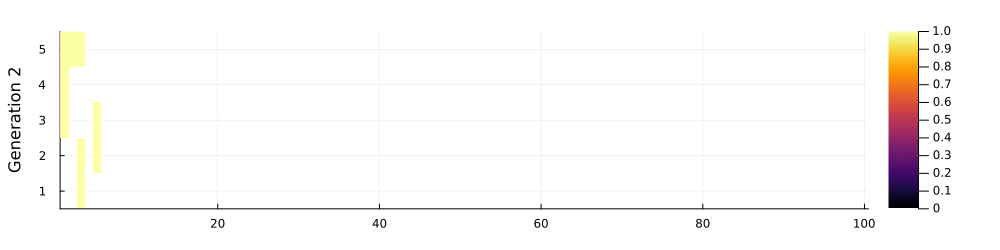

In [7]:
re_heatmap_meanf(test)

Let's also see what that deme-average heterozygosity distribution looks like (on a stringent logarithmic scale):

┌ Info: Saved animation to C:\Users\Hartree\AppData\Local\Temp\jl_cbYRGv8laN.gif
└ @ Plots C:\Users\Hartree\.julia\packages\Plots\ju9dp\src\animation.jl:156


Plots.AnimatedGif("C:\\Users\\Hartree\\AppData\\Local\\Temp\\jl_cbYRGv8laN.gif")
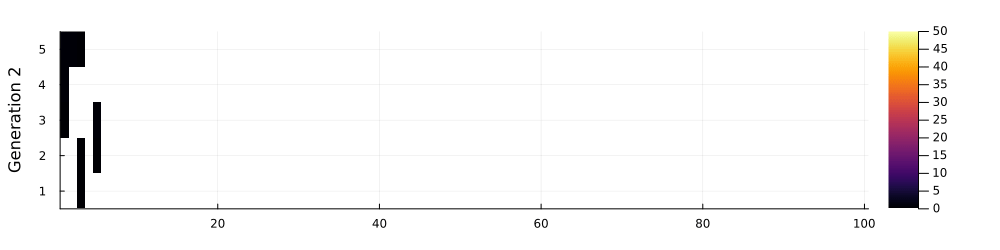

In [8]:
re_heatmap_Aasel(test;log_base=1.00001,clim=(0,50))

Since the (default) value of n_sel_loci (the number of selected loci out of n_loci=1000) in this simulation is 500, let's run a quick test to confirm that AA+Aa+aa=500:

┌ Info: Saved animation to C:\Users\Hartree\AppData\Local\Temp\jl_exQ9uJQnkd.gif
└ @ Plots C:\Users\Hartree\.julia\packages\Plots\ju9dp\src\animation.jl:156


Plots.AnimatedGif("C:\\Users\\Hartree\\AppData\\Local\\Temp\\jl_exQ9uJQnkd.gif")
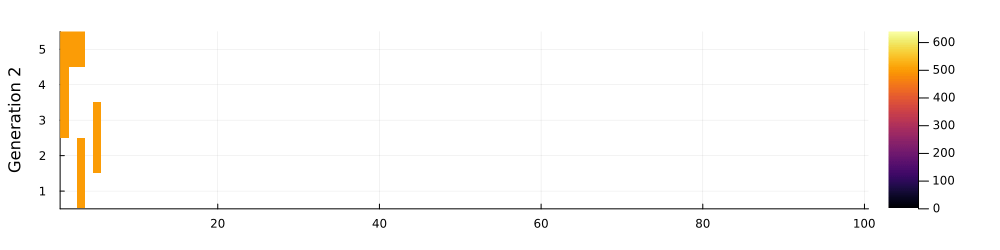

In [9]:
re_heatmap(test["AAsel"]+test["Aasel"]+test["aasel"];clim=(0,640))

RESK also includes methods that operate with the population front.

For example, we can get only the front values of deme-average fitness and plot them with the following:

┌ Info: Saved animation to C:\Users\Hartree\AppData\Local\Temp\jl_6pWz0d43y7.gif
└ @ Plots C:\Users\Hartree\.julia\packages\Plots\ju9dp\src\animation.jl:156


Plots.AnimatedGif("C:\\Users\\Hartree\\AppData\\Local\\Temp\\jl_6pWz0d43y7.gif")
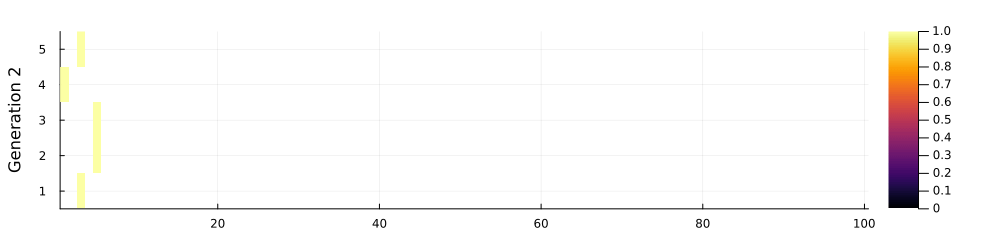

In [10]:
test_meanf_frontarr = front_array(test,"meanf";oneside=true)
re_heatmap_meanf(test_meanf_frontarr,1,20)

And with the following, we can find the mean front fitness, and then plot its evolution in time:

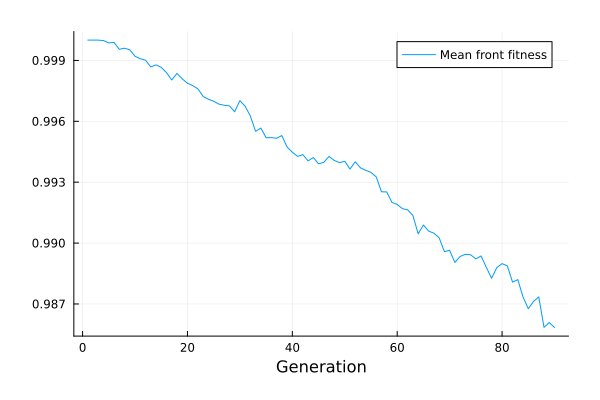

In [11]:
test_meanf_frontav = average_front(test,"meanf")
plot(test_meanf_frontav,xlabel="Generation",label="Mean front fitness")

Likewise, we can find the population average:

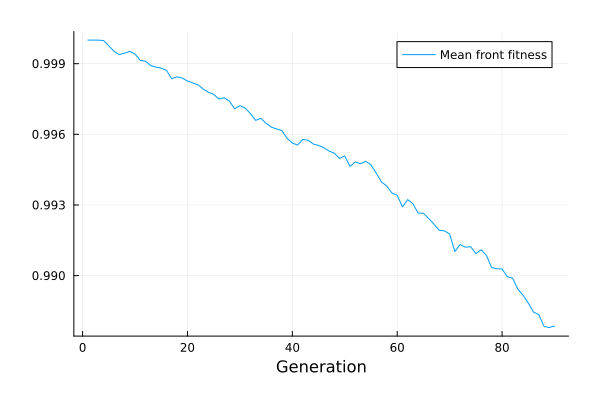

In [12]:
test_meanf_av = average_all(test,"meanf")
plot(test_meanf_av,xlabel="Generation",label="Mean front fitness")